In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('fish_participant.csv')

In [3]:
raw_data.sort_values(by='Weight',ascending = False)

,Species,Weight,Length1,Length2,Length3,Height,Width
13,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
84,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
63,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
24,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
41,Perch,1000.0,40.2,43.5,46.0,12.6040,8.1420
...,...,...,...,...,...,...,...
33,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800
62,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
28,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
8,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476


In [4]:
#display the descriptive statistics of the variables
raw_data.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width
count,111,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,39,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,401.676577,26.447748,28.615315,31.422523,9.015701,4.480407
std,NaN,338.510755,9.795155,10.498781,11.306311,4.225369,1.696240
min,NaN,5.900000,7.500000,8.400000,8.800000,1.738800,1.047600
25%,NaN,142.500000,20.000000,22.000000,23.500000,6.138850,3.551400
50%,NaN,300.000000,25.400000,27.500000,30.100000,8.145400,4.335000
75%,NaN,682.500000,33.750000,36.250000,40.150000,12.143400,5.658300


In [5]:
raw_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
#compute for avg length
raw_data['avg_length'] = raw_data[['Length1', 'Length2', 'Length3']].mean(axis=1)
raw_data

,Species,Weight,Length1,Length2,Length3,Height,Width,avg_length
0,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333
1,Perch,110.0,20.0,22.0,23.5,5.5225,3.9950,21.833333
2,Roach,160.0,20.5,22.5,25.3,7.0334,3.8203,22.766667
3,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142,15.733333
4,Bream,700.0,30.4,33.0,38.3,14.8604,5.2854,33.900000
...,...,...,...,...,...,...,...,...
106,Perch,197.0,23.5,25.6,27.0,6.5610,4.2390,25.366667
107,Parkki,140.0,19.0,20.7,23.2,8.5376,3.2944,20.966667
108,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957,21.000000
109,Perch,685.0,34.0,36.5,39.0,10.8810,6.8640,36.500000


### Check for outliers and remove them

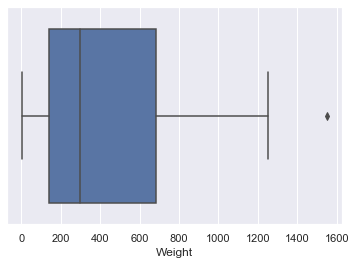

In [7]:
sns.boxplot(raw_data['Weight'])

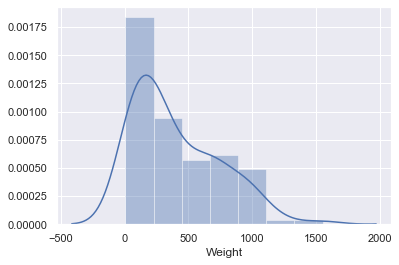

In [8]:
# display the probability distribution function (PDF) of a variable
# The PDF will show how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers

sns.distplot(raw_data["Weight"])

In [9]:
# Removed the top 1% of the data about 'Weight'
# Declare a variable that will be equal to the 99th percentile of the 'Weight' variable
q = raw_data["Weight"].quantile(0.99)
# Create a new df, with the condition that all weight must be below the 99th percentile of 'Weight'
data_1 = raw_data[raw_data["Weight"]<q]

data_1.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width,avg_length
count,109,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,383.358716,25.942202,28.076147,30.864220,8.995014,4.442168,28.294190
std,NaN,312.249527,9.128631,9.793270,10.613893,4.260861,1.686812,9.825397
min,NaN,5.900000,7.500000,8.400000,8.800000,1.738800,1.047600,8.233333
25%,NaN,140.000000,20.000000,22.000000,23.500000,6.110000,3.547800,21.833333
50%,NaN,290.000000,25.200000,27.300000,30.000000,7.792000,4.322500,27.266667
75%,NaN,650.000000,32.700000,36.000000,39.400000,12.354000,5.580000,36.100000


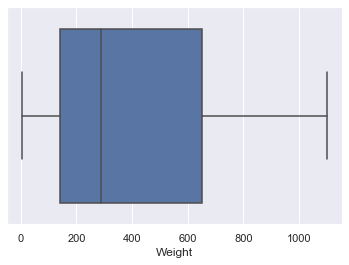

In [10]:
#check to see if outliers have been removed
sns.boxplot(data_1['Weight'])

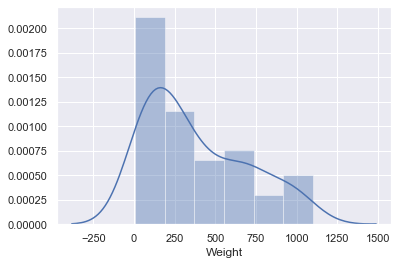

In [11]:
# check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.distplot(data_1["Weight"])

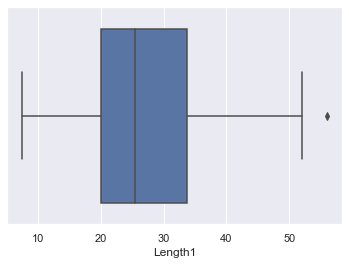

In [12]:
# treat the other numerical variables in a similar way
sns.boxplot(raw_data['Length1'])

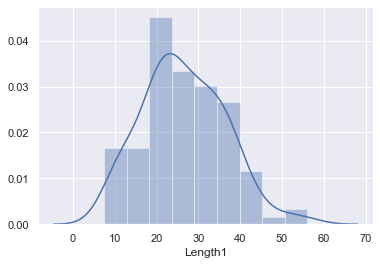

In [13]:
sns.distplot(raw_data['Length1'])

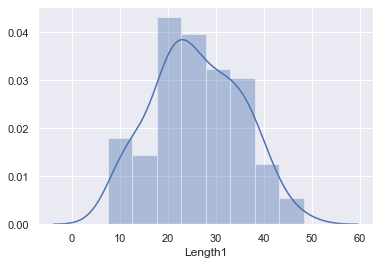

In [14]:
q = raw_data['Length1'].quantile(0.99)
data_2 = data_1[data_1['Length1']<q]
sns.distplot(data_2['Length1'])

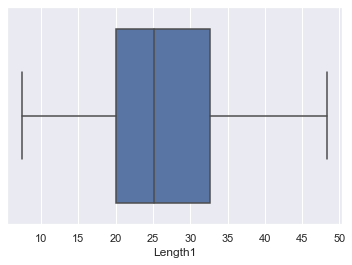

In [15]:
sns.boxplot(data_1['Length1'])

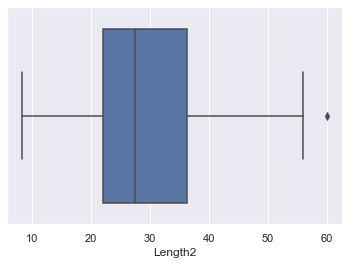

In [16]:
sns.boxplot(raw_data['Length2'])

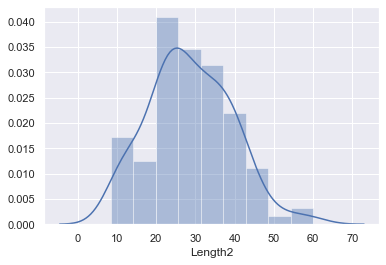

In [17]:
sns.distplot(raw_data['Length2'])

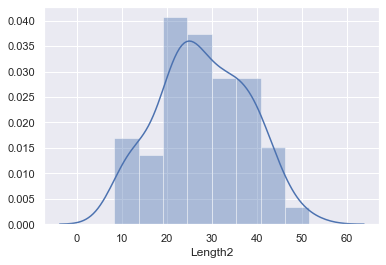

In [18]:
q = raw_data['Length2'].quantile(0.99)
data_3 = data_2[data_2['Length2']<q]
sns.distplot(data_3['Length2'])

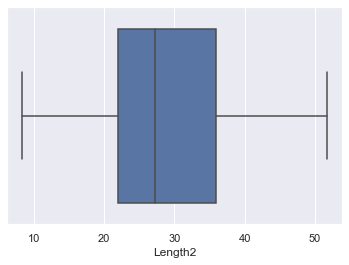

In [19]:
sns.boxplot(data_1['Length2'])

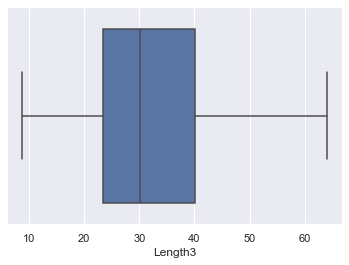

In [20]:
sns.boxplot(raw_data['Length3'])

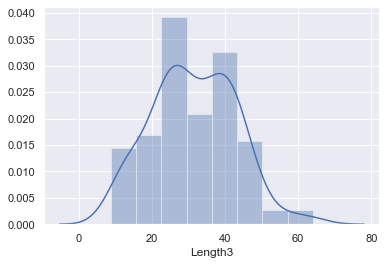

In [21]:
sns.distplot(raw_data['Length3'])

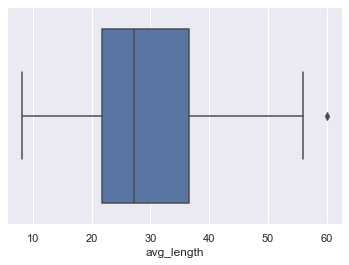

In [22]:
sns.boxplot(raw_data['avg_length'])

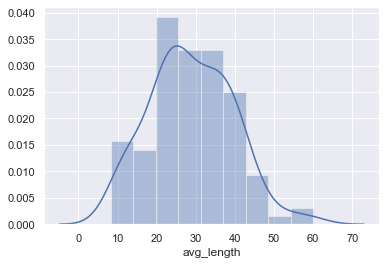

In [23]:
sns.distplot(raw_data['avg_length'])

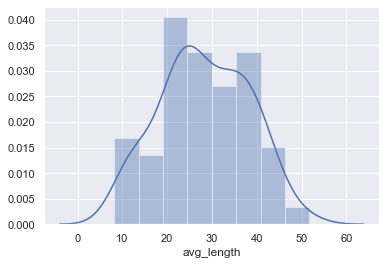

In [24]:
q = raw_data['avg_length'].quantile(0.99)
data_4 = data_3[data_3['avg_length']<q]
sns.distplot(data_4['avg_length'])

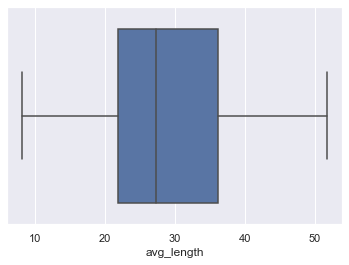

In [25]:
sns.boxplot(data_4['avg_length'])

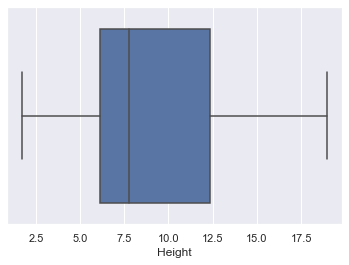

In [26]:
sns.boxplot(data_4['Height'])

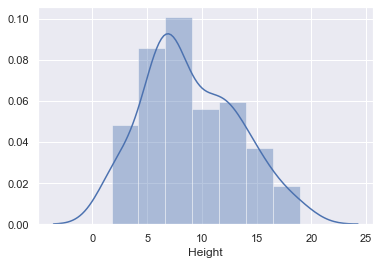

In [27]:
sns.distplot(data_4['Height'])

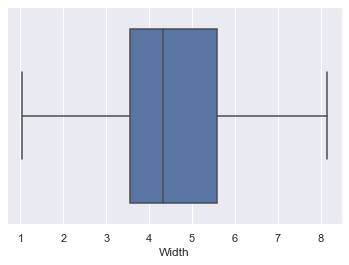

In [28]:
sns.boxplot(data_4['Width'])

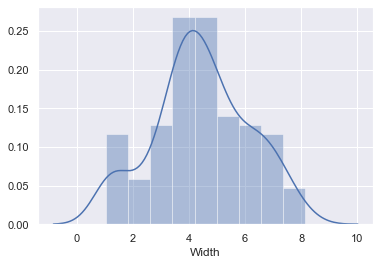

In [29]:
sns.distplot(data_4['Width'])

In [30]:
data_cleaned = data_4.reset_index(drop=True)

In [31]:
data_cleaned.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width,avg_length
count,109,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,383.358716,25.942202,28.076147,30.864220,8.995014,4.442168,28.294190
std,NaN,312.249527,9.128631,9.793270,10.613893,4.260861,1.686812,9.825397
min,NaN,5.900000,7.500000,8.400000,8.800000,1.738800,1.047600,8.233333
25%,NaN,140.000000,20.000000,22.000000,23.500000,6.110000,3.547800,21.833333
50%,NaN,290.000000,25.200000,27.300000,30.000000,7.792000,4.322500,27.266667
75%,NaN,650.000000,32.700000,36.000000,39.400000,12.354000,5.580000,36.100000


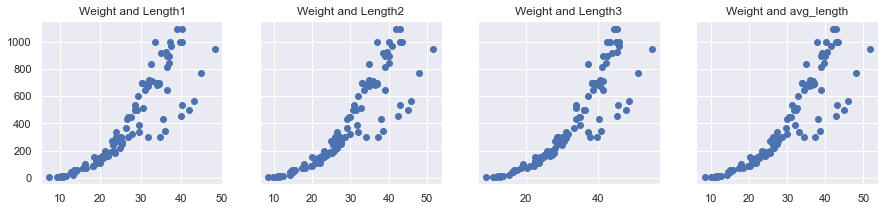

In [32]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3)) #sharey -> share 'Weight' as y
ax1.scatter(data_cleaned['Length1'],data_cleaned['Weight'])
ax1.set_title('Weight and Length1')
ax2.scatter(data_cleaned['Length2'],data_cleaned['Weight'])
ax2.set_title('Weight and Length2')
ax3.scatter(data_cleaned['Length3'],data_cleaned['Weight'])
ax3.set_title('Weight and Length3')
ax4.scatter(data_cleaned['avg_length'],data_cleaned['Weight'])
ax4.set_title('Weight and avg_length')

plt.show()

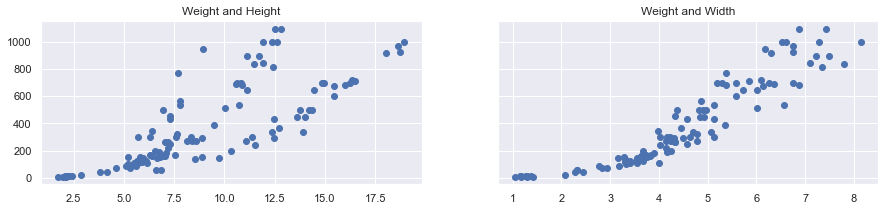

In [33]:
f, (ax4, ax5) = plt.subplots(1, 2, sharey=True, figsize =(15,3)) #sharey -> share 'Weight' as y
ax4.scatter(data_cleaned['Height'],data_cleaned['Weight'])
ax4.set_title('Weight and Height')
ax5.scatter(data_cleaned['Width'],data_cleaned['Weight'])
ax5.set_title('Weight and Width')


plt.show()

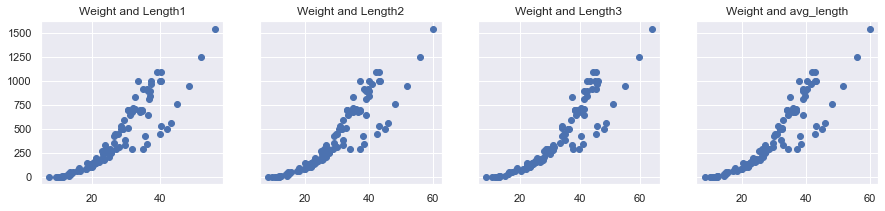

In [34]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3)) #sharey -> share 'Weight' as y
ax1.scatter(raw_data['Length1'],raw_data['Weight'])
ax1.set_title('Weight and Length1')
ax2.scatter(raw_data['Length2'],raw_data['Weight'])
ax2.set_title('Weight and Length2')
ax3.scatter(raw_data['Length3'],raw_data['Weight'])
ax3.set_title('Weight and Length3')
ax4.scatter(raw_data['avg_length'],raw_data['Weight'])
ax4.set_title('Weight and avg_length')

plt.show()

In [35]:
# Transform 'Weight' with a log transformation
log_weight = np.log(data_cleaned['Weight'])
# add it to the data frame
data_cleaned['log_weight'] = log_weight
data_cleaned

,Species,Weight,Length1,Length2,Length3,Height,Width,avg_length,log_weight
0,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333,6.063785
1,Perch,110.0,20.0,22.0,23.5,5.5225,3.9950,21.833333,4.700480
2,Roach,160.0,20.5,22.5,25.3,7.0334,3.8203,22.766667,5.075174
3,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142,15.733333,4.094345
4,Bream,700.0,30.4,33.0,38.3,14.8604,5.2854,33.900000,6.551080
...,...,...,...,...,...,...,...,...,...
104,Perch,197.0,23.5,25.6,27.0,6.5610,4.2390,25.366667,5.283204
105,Parkki,140.0,19.0,20.7,23.2,8.5376,3.2944,20.966667,4.941642
106,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957,21.000000,4.700480
107,Perch,685.0,34.0,36.5,39.0,10.8810,6.8640,36.500000,6.529419


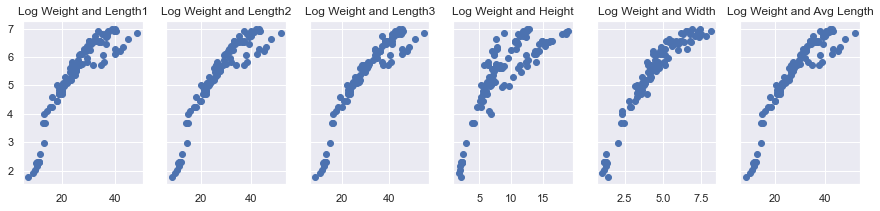

In [36]:
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, sharey=True, figsize =(15,3)) #sharey -> share 'Weight' as y
ax1.scatter(data_cleaned['Length1'],data_cleaned['log_weight'])
ax1.set_title('Log Weight and Length1')
ax2.scatter(data_cleaned['Length2'],data_cleaned['log_weight'])
ax2.set_title('Log Weight and Length2')
ax3.scatter(data_cleaned['Length3'],data_cleaned['log_weight'])
ax3.set_title('Log Weight and Length3')
ax4.scatter(data_cleaned['Height'],data_cleaned['log_weight'])
ax4.set_title('Log Weight and Height')
ax5.scatter(data_cleaned['Width'],data_cleaned['log_weight'])
ax5.set_title('Log Weight and Width')
ax6.scatter(data_cleaned['avg_length'],data_cleaned['log_weight'])
ax6.set_title('Log Weight and Avg Length')

plt.show()

In [37]:
# Since log weight variable will be used, we can drop the old 'Weight' column
data_cleaned = data_cleaned.drop(['Weight'],axis=1)

In [38]:
data_cleaned.columns.values

array(['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'avg_length', 'log_weight'], dtype=object)

In [39]:
# check for multicollinearity... after several trial and error, the combination of Length1 and
# Height gave the lowest VIF's

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Length1', 'Height']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif = vif.sort_values(by='VIF',ascending = False)
vif['VIF'] = round(vif['VIF'] ,2)
vif["Features"] = variables.columns

In [40]:
vif

,VIF,Features
0,9.62,Length1
1,9.62,Height


In [41]:
# drop the other variables
data_no_multicollinearity = data_cleaned.drop(['Length2', 'Length3', 'Width', 'avg_length'],axis=1)

In [42]:
# create dummies to include the categorical data in the regression
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [43]:
data_with_dummies.head()

,Length1,Height,log_weight,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,26.5,12.4440,6.063785,0,0,0,0,0,0
1,20.0,5.5225,4.700480,0,1,0,0,0,0
2,20.5,7.0334,5.075174,0,0,0,1,0,0
3,14.3,6.5772,4.094345,1,0,0,0,0,0
4,30.4,14.8604,6.551080,0,0,0,0,0,0


In [44]:
data_with_dummies.columns.values

array(['Length1', 'Height', 'log_weight', 'Species_Parkki',
       'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt',
       'Species_Whitefish'], dtype=object)

In [45]:
cols = ['log_weight', 'Length1', 'Height', 'Species_Parkki',
       'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt',
       'Species_Whitefish']

In [46]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_weight,Length1,Height,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,6.063785,26.5,12.4440,0,0,0,0,0,0
1,4.700480,20.0,5.5225,0,1,0,0,0,0
2,5.075174,20.5,7.0334,0,0,0,1,0,0
3,4.094345,14.3,6.5772,1,0,0,0,0,0
4,6.551080,30.4,14.8604,0,0,0,0,0,0


### Linear Regression Model

In [47]:
# The target(s) (dependent variable) is 'log weight'
targets = data_preprocessed['log_weight']

In [48]:
# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_weight'],axis=1)

In [49]:
#scale the data

# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

In [51]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

In [52]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# check the outputs of the regression
# store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)
y_hat

array([6.53186376, 4.19532417, 6.46549689, 4.85979675, 6.22231446,
       6.55117153, 6.52332716, 5.91527434, 5.43140359, 4.42246727,
       5.40519869, 4.60602367, 5.2645176 , 7.33949748, 4.62193148,
       7.23144236, 3.94980569, 6.85108084, 7.2148941 , 5.34717536,
       6.73439108, 6.15817927, 3.19378256, 6.58104428, 6.20936241,
       5.36352153, 6.37647836, 6.02875384, 5.35534844, 2.19158746,
       4.48222778, 6.6344802 , 2.27000305, 6.07178574, 2.1045463 ,
       5.62894898, 2.33971823, 6.16114633, 2.34912565, 4.61631596,
       4.2828381 , 2.33971823, 5.80319901, 5.62809455, 6.37255018,
       5.12098664, 5.09114109, 5.13491233, 5.55370472, 5.47863836,
       7.08397547, 6.54797344, 7.14367124, 2.27265848, 4.89515811,
       4.73633235, 6.30711004, 6.4012717 , 2.57780599, 5.5992256 ,
       6.26816845, 5.42220177, 2.24774091, 5.5360879 , 7.05528466,
       6.85638519, 4.74599127, 4.79579996, 5.53639995, 2.39531314,
       4.69479527, 4.83494613, 4.22131602, 4.94830466, 7.12436

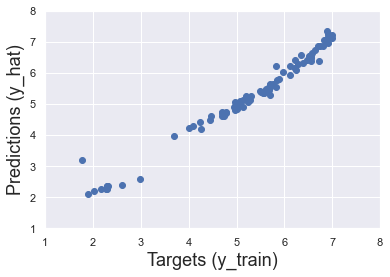

In [54]:
# compare the targets (y_train) and the predictions (y_hat)
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim(1,8)
plt.ylim(1,8)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

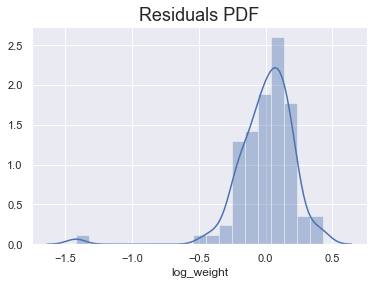

In [55]:
# check the model with a residual plot
# plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed

In [56]:
# Find the R-squared of the model
reg.score(x_train,y_train)


0.9735709751843352

In [57]:
x_train.shape

(87, 8)

In [58]:
r2 = reg.score(x_train,y_train)
n = x_train.shape[0]
p = x_train.shape[1] 
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.9708603059724722

In [59]:
# Obtain the bias (intercept) of the regression
reg.intercept_

5.385701927732724

In [60]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([ 0.91585216,  0.29986379,  0.03237382,  0.01733289, -0.16638433,
        0.04431512, -0.34873809,  0.03735171])

In [61]:
# Create a regression summary
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Length1,0.915852
1,Height,0.299864
2,Species_Parkki,0.032374
3,Species_Perch,0.017333
4,Species_Pike,-0.166384
5,Species_Roach,0.044315
6,Species_Smelt,-0.348738
7,Species_Whitefish,0.037352


In [62]:
# Check the different categories in the 'Species' variable
data_cleaned['Species'].unique()

array(['Bream', 'Perch', 'Roach', 'Parkki', 'Smelt', 'Whitefish', 'Pike'],
      dtype=object)

### Testing

In [63]:
y_hat_test = reg.predict(x_test)

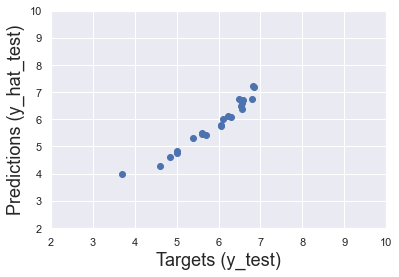

In [64]:
# Create a scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(2,10)
plt.ylim(2,10)
plt.show()

In [65]:
# manually check these predictions
# To obtain the actual weight, we take the exponential of the log_weight
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf

,Prediction
0,100.085385
1,1376.016207
2,582.345408
3,746.820629
4,127.911756
5,118.402862
6,73.008259
7,459.781142
8,225.181549
9,438.424123


In [66]:
# include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,100.085385,430.0
1,1376.016207,NaN
2,582.345408,NaN
3,746.820629,NaN
4,127.911756,700.0
5,118.402862,NaN
6,73.008259,NaN
7,459.781142,NaN
8,225.181549,NaN
9,438.424123,NaN


In [67]:
# to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    4.828314
1    6.829794
2    6.551080
3    6.551080
4    5.010635
Name: log_weight, dtype: float64

In [68]:
# overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log weight
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,100.085385,125.0
1,1376.016207,925.0
2,582.345408,700.0
3,746.820629,700.0
4,127.911756,150.0
5,118.402862,150.0
6,73.008259,100.0
7,459.781142,500.0
8,225.181549,300.0
9,438.424123,540.0


In [69]:
# calculate the difference between the targets and the predictions
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [70]:
# check to see how far off we are from the result percentage-wise
# take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,100.085385,125.0,24.914615,19.931692
1,1376.016207,925.0,-451.016207,48.758509
2,582.345408,700.0,117.654592,16.807799
3,746.820629,700.0,-46.820629,6.688661
4,127.911756,150.0,22.088244,14.725496
5,118.402862,150.0,31.597138,21.064759
6,73.008259,100.0,26.991741,26.991741
7,459.781142,500.0,40.218858,8.043772
8,225.181549,300.0,74.818451,24.939484
9,438.424123,540.0,101.575877,18.810348


In [71]:
# display the descriptives
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,22.000000,22.000000,22.000000,22.000000
mean,479.764628,463.590909,-16.173719,19.099681
std,381.778828,283.852352,145.585753,11.748980
min,53.422705,40.000000,-451.016207,4.371399
25%,208.832296,231.000000,-6.412665,8.379218
50%,372.357993,440.000000,28.467913,17.809073
75%,723.879451,696.250000,41.448598,25.357160
max,1376.016207,950.000000,117.654592,48.758509


In [72]:
# check these outputs manually
pd.options.display.max_rows = 999
# display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
18,655.06,685.00,29.94,4.37
10,858.14,900.00,41.86,4.65
3,746.82,700.00,-46.82,6.69
16,203.38,218.00,14.62,6.71
7,459.78,500.00,40.22,8.04
13,413.38,450.00,36.62,8.14
11,247.24,272.00,24.76,9.10
20,234.15,270.00,35.85,13.28
4,127.91,150.00,22.09,14.73
21,825.51,714.00,-111.51,15.62


In [73]:
# check the MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_hat)
mse

0.05146592314030054

In [74]:
# check the RMSE
root_mse = np.sqrt(mse)
root_mse

0.2268610216416662